Event Driven Simulation 

In [2]:
%reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson


In [61]:
import simpy
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

SCHEDULE_T=1 #Clock des Schedulers 

#function to monitor the level of the different queues
def monitor(queue,monitor): 
    monitor.update({env.now: queue.level})
    return monitor

#scheduler takes packets from the queues according to the capacity of each user
def scheduler(env, users, SCHEDULE_T):
    
    counter=1 #counts the number of scheduling procedures
    alpha=-np.log10(0.01)/100
    
    while True: #größte Warteschlange wird auch bedient
        yield env.timeout(SCHEDULE_T) #for each ms the scheduling is active -> per TTI
        metric=np.array([]) 
        print(env.now)
        users[0].mon= monitor(users[0].queue,users[0].mon)
        users[1].mon= monitor(users[1].queue,users[1].mon)
        users[2].mon= monitor(users[2].queue,users[2].mon)
        
        for i in np.arange(np.size(users)):
                  
            if(users[i].qos==1):
                metric=np.append(metric, (alpha*users[i].queue.level*(users[i].cp/users[i].mR)))  #list the metric of all UEs in the process 
                users[i].mR=(1-1/counter)*users[i].mR #Ratenanpassung für alle Nutzer
                
            elif(users[i].qos==0):
                metric=np.append(metric,(users[i].cp/users[i].mR))
                users[i].mR=(1-1/counter)*users[i].mR #Ratenanpassung für alle Nutzer
                
        
        sched_user_list = (-metric).argsort()[:5] # wählt die 5 UEs mit größter Metrik aus #find UE with maximal metric that will be used for scheduling
        
        print(sched_user_list)    
        print(users[2].queue.level)
        
        for k in [0,1,2,3,4]:
            sched_user=sched_user_list[k]
            sched_size=(round(users[sched_user].cp/5)) #scheduling size according to the channel capacity of the user -> user gets full bandwidth for 1ms (1TTI)
            #users[sched_user].mon= monitor(users[sched_user].queue,users[sched_user].mon)
            users[sched_user].mR=users[sched_user].mR+(1/counter)*sched_size
            users[sched_user].queue.get(sched_size)
        counter=counter+1
        #print(users[2].mR)
        #print(users[2].cp)
        #print(env.now)

        
            
class ue:
    def __init__(self,sinr,sinr2,cell1,cell2,env,qos):
        self.sinr=sinr
        self.sinr2=sinr2
        self.qos=qos
        self.cp=0.5*0.7*20000000*np.log2(1+np.power(10,sinr/10))/8000 #division by 8000 to determine number of bits that can be transmitted per TTI (1ms)
        self.cp2=0.5*0.7*20000000*np.log2(1+np.power(10,sinr2/10))/8000
        self.cell1=cell1
        self.cell2=cell2
        self.mR=0.1 #mittlere Rate
        self.queue=simpy.Container(env)
        self.mon={}
        self.metric=self.sinr+self.queue.level
        
    def rt_user(self,env):
        on_off=1
        counter=0
        while True:
            if(on_off==1 and counter<3000):
                self.queue.put(160) #20 bytes
                mon= monitor(self.queue,self.mon)
                #yield env.timeout(poisson.rvs(6, 1))
                #print('On Phase')
                #print(self.queue.level)
                counter=counter+20
                #print(counter)
                yield env.timeout(20) #every 20ms new packet
            elif(on_off==0):
                on_off=1
                #print('Off Phase')
                #print(self.queue.level)
                yield env.timeout(3000) #3s no packet to be sent
            elif(on_off==1 and counter>=3000):
                on_off=0
                counter=0
                #print('change from ON-OFF')
            
    def user_packets(self,env):
        while True:
            print('normal ue')
            #print('o-user')
            self.queue.put(4000)
            #self.mon= monitor(self.queue,self.mon)
            yield env.timeout(poisson.rvs(500, 1))
    

##Ausführung der Simulation

env=simpy.Environment()
#env = simpy.rt.RealtimeEnvironment(factor=1/10)

ue_list=np.array([])
#ue_list=np.append(ue_list,ue(15,5,'19','18',env,0))
#ue_list=np.append(ue_list,ue(15,5,'19','18',env,0))
#ue_list=np.append(ue_list,ue(20,7,'19','18',env,0))


for i in np.arange(0,200):
    ue_list=np.append(ue_list,ue(15,7,'19','18',env,0))


env.process(scheduler(env,ue_list,SCHEDULE_T))

#env.process(ue_list[0].rt_user(env))
#env.process(ue_list[1].user_packets(env))
#env.process(ue_list[2].user_packets(env))

for i in np.arange(0,200):
    env.process(ue_list[i].user_packets(env))


env.run(until=5000)

normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue
normal ue


<ipython-input-61-9831a8219e96>:35: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,(users[i].cp/users[i].mR))



3120
50
[134  55  54  53  52]
3120
51
[142  37  38  39  40]
3120
52
[60 41 42 43 44]
3120
53
[178 149 150 151 152]
3120
54
[180 147 154 158 159]
3120
55
[181 145 146  77  76]
3120
56
[ 58  72 160 161 162]
3120
57
[ 57 144 163 164 168]
3120
58
[182 137 140 141 143]
3120
59
[184  73 135 169 170]
3120
60
[ 50  74  59 171 172]
3120
61
[ 48 114  56 173 174]
3120
62
[ 46  96 196 195 194]
3120
63
[183  35  36 193 192]
3120
64
[87 32 33 34 89]
3120
65
[88 30 31 95 97]
3120
66
[ 26  27  28  29 198]
3120
67
[ 23 100 101 102 186]
3120
68
[ 21  22 103  24  25]
3120
69
[ 19  20 104 105 106]
3120
70
[ 17 111 110  51 109]
3120
71
[ 47 113 112  49 108]
3120
72
[ 45 107  18  98  16]
3120
73
[12 15 14 13 11]
3120
74
[10  1  2  3  4]
3120
75
[5 6 7 8 9]
2240
76
[  0 116 117 118 119]
2240
77
[ 99 120 121 122 123]
2240
78
[199 126 127 115 128]
2240
79
[124 187 189  94 131]
2240
80
[129 132 130 197 125]
2240
81
[154  68  67  66  65]
2240
82
[156 147  64  63  62]
2240
83
[157 134  71  70  69]
2240
84
[ 53  

[ 18 116  17 167  15]
480
386
[120  68  81 117 118]
480
387
[169  13  12  11 174]
480
388
[119  55 188   5 176]
480
389
[ 0 87 84 79 78]
480
390
[ 99  62  61  58 161]
480
391
[ 71  72  70  69 163]
480
392
[138 194 189  33 142]
480
393
[170  24  25  26 105]
480
394
[ 63 110  64 126 187]
480
395
[164 112 190  52 104]
480
396
[121  36  37  38  39]
480
397
[77 54 51 75 50]
480
398
[146 111  48  49 101]
480
399
[157 156 165 122 179]
480
400
[159 107 147 160 145]
480
401
[ 27  44  93  92 141]
480
402
[ 67 180 181  19  46]
480
403
[175  28  40  41  42]
480
404
[154 182 136 158  91]
480
405
[ 59  30  29 162  43]
480
406
[166  34 143 184 183]
480
407
[152 134 178 177  86]
480
408
[113  31  65  83  82]
480
409
[185 186 144 173 171]
480
410
[ 94 198 168  96  95]
480
411
[100  23 114 115 140]
480
412
[ 47  66  60 131 132]
480
413
[ 45 155  53 133 130]
480
414
[153 129  56  57 109]
480
415
[102  74  21  22  88]
480
416
[103   1   2   3   4]
480
417
[197   6   7   8   9]
480
418
[199 149  32 148  35

[ 53 171 169 168 173]
80
621
[147  44  47 177  56]
80
622
[ 61 185 186  59 166]
80
623
[ 11  19 108  46  45]
80
624
[ 9 10  8  7  6]
80
625
[  1   2   3   4 109]
80
626
[  0 143 132 176 175]
80
627
[ 24  26 130 174 172]
80
628
[ 50 167 165  36  37]
80
629
[139  55 133  25 170]
80
630
[ 63  91 120 142  68]
80
631
[ 69  38 138  18 101]
80
632
[13 15 14 49 12]
80
633
[102 137  80  20  17]
80
634
[187  96  16 183 184]
80
635
[161 121 107 140  51]
80
636
[188 163  97  71 104]
80
637
[ 52  88  87 192 191]
80
638
[ 79  39 159 162   5]
80
639
[179  74  72 164  84]
80
640
[ 78 194 190 189 112]
80
641
[ 57 111 119 123  22]
80
642
[135 128  73 150 131]
80
643
[193 181 180  66 129]
80
644
[ 99 198  98  95  94]
80
645
[199  82 152  77  76]
80
646
[ 92  43  48 122  62]
80
647
[ 89 156  60  64  65]
80
648
[110  85 125  28 126]
80
649
[144  42 145 106 141]
80
650
[100 124  30  75 127]
80
651
[136 105  83 178 134]
80
652
[154  90 118 117  41]
80
653
[ 21 182 103  70  67]
80
654
[146  54  53 108 109]
80

[ 67 173 171 170  83]
80
939
[169 155  90 166 157]
80
normal ue
940
[ 56  88 134  54 165]
80
941
[116 140 182  52  53]
80
942
[ 58  64  49 163 162]
80
943
[174 177  39  69  68]
80
944
[164 107 161  44 159]
80
normal ue
normal ue
945
[ 51 186  37  36  35]
80
normal ue
normal ue
normal ue
normal ue
946
[ 62  79  61 192  10]
80
normal ue
normal ue
947
[121 197 196 195 194]
80
normal ue
normal ue
948
[179   5   6   7   8]
80
normal ue
normal ue
949
[ 85  33  34 142 141]
80
950
[ 78  59  32 139 137]
80
951
[ 27 108 153  29 136]
80
952
[124  26 130 120 118]
80
normal ue
normal ue
953
[ 45 175 102  24  25]
80
normal ue
954
[ 48 114 115 106 105]
80
normal ue
normal ue
normal ue
955
[ 72  40  46 100 104]
80
normal ue
956
[ 19  93 112  47  20]
80
957
[ 17  18 176  15  14]
80
958
[ 97 191 189 188 187]
80
959
[ 12  13 185 184 183]
80
normal ue
normal ue
960
[110 190 101 109  23]
80
961
[193 181 180 150  73]
80
962
[ 66 135 131 129 128]
80
normal ue
normal ue
963
[199 198  98  95  94]
80
normal ue


[144 143 154  81  92]
560
1211
[117 145 122  89 160]
560
1212
[169  94 126 158 168]
560
1213
[113  43 123 103  98]
560
1214
[125  21 146  63 148]
560
1215
[ 82  86  95 155  65]
560
1216
[138   1   2   3   4]
560
1217
[166  60 133 151 152]
560
1218
[ 90  80  56  75 157]
560
1219
[ 67 149  53  54 173]
560
1220
[ 64  49  39 186  37]
560
1221
[165 171 170 182 116]
560
1222
[140 164 174  44 134]
560
1223
[ 35  51 163 177  88]
560
1224
[52 68 69 36 83]
560
1225
[ 47  48 121  24  25]
560
1226
[104 107  27  26  59]
560
1227
[192 142 130 114 190]
560
1228
[ 93 179  62  29 185]
560
1229
[ 33  32  15 108  78]
560
1230
[159 176 175 112 115]
560
1231
[ 34  79 162 161 101]
560
1232
[139 183 124  85  72]
560
1233
[120  19  20 187 118]
560
1234
[137 110 109 106 136]
560
1235
[184  61  97 100 141]
560
1236
[ 17  45  58  18 188]
560
1237
[189  14  13 191  10]
560
1238
[153   8   7   6   5]
560
1239
[197 196 195 194  12]
560
1240
[105  40 102  23  46]
560
1241
[ 73 193 181 180 150]
560
1242
[199  22  77 

[137 110 109 106 104]
560
1474
[159 176  20  83  14]
560
normal ue
1475
[ 17 134 118 112  47]
560
normal ue
1476
[ 79  33  34  45 124]
560
normal ue
normal ue
normal ue
normal ue
1477
[ 13  15 185  12  10]
560
normal ue
normal ue
normal ue
1478
[187 191 190 189 188]
560
normal ue
1479
[197 196 195 194 136]
560
1480
[102  46 105  40  23]
560
normal ue
normal ue
1481
[193 181 180  73 150]
560
normal ue
normal ue
normal ue
normal ue
normal ue
1482
[199  76  77  22 135]
560
1483
[ 92  96 119 128 129]
560
normal ue
normal ue
normal ue
1484
[132  43  57  66  91]
560
normal ue
normal ue
1485
[ 28 178 167 154  16]
560
normal ue
1486
[ 42 127 144 143 131]
560
normal ue
1487
[  0 156 147 111 198]
560
1488
[87 55 50 11  9]
560
normal ue
1489
[ 99 172 155 166 169]
560
normal ue
normal ue
1490
[94 30 86 82 84]
560
normal ue
1491
[ 31 157 158 125 152]
560
normal ue
1492
[146  21  80 173 168]
560
normal ue
normal ue
1493
[ 75  64  70  71 126]
560
normal ue
normal ue
normal ue
1494
[123 148 138 182 12

1716
[100  65  40  53  61]
160
1717
[116  58  59  68  33]
160
1718
[140  46 187  85 118]
160
1719
[ 88  15 137  12  10]
160
1720
[ 47 163 162 161 133]
160
1721
[ 28 181 180 167 166]
160
1722
[ 0 50 55 57 66]
160
1723
[99 73 76 77 87]
160
1724
[199 193  91  92  96]
160
1725
[135  43 198  16  42]
160
1726
[150 129 119 111 147]
160
1727
[169 154 155 156  11]
160
1728
[ 22 178 172 132 144]
160
1729
[131 128 127   9 143]
160
1730
[31 30 94 81 82]
160
1731
[ 84  86 152 149 125]
160
1732
[157 173  64  21  70]
160
1733
[148  90 158  71  75]
160
1734
[126 103 113 117 146]
160
1735
[168  80 182 138  98]
160
1736
[ 67  74 123  78 122]
160
1737
[  1   2   3   4 134]
160
1738
[ 44 151  62  51  52]
160
1739
[ 34 130  27  26  25]
160
1740
[185  24 174 177 139]
160
1741
[183  35  89  41 101]
160
1742
[ 85  23  68 187  65]
160
1743
[ 79 160  61  60  59]
160
1744
[118 116 121  72 137]
160
1745
[159  95  33  58 176]
160
1746
[18 46 88 93 53]
160
1747
[145 153  12  19  10]
160
1748
[140 197 196 195 194]
1

[125 131 132 138  55]
160
normal ue
normal ue
1971
[ 98  57 148  87 119]
160
normal ue
normal ue
1972
[ 90 152  84  31  30]
160
1973
[ 71  21 157 173  75]
160
1974
[178  64  70  82  94]
160
normal ue
normal ue
1975
[126 146 113 103 117]
160
1976
[123   1   2   3   4]
160
normal ue
1977
[ 34  74  67  78 122]
160
normal ue
normal ue
normal ue
1978
[183  27  26  25 190]
160
normal ue
normal ue
1979
[ 44 191 184 185   5]
160
normal ue
normal ue
1980
[ 39 192  10   8 134]
160
normal ue
normal ue
1981
[151 153  41  72 102]
160
normal ue
1982
[ 23  63  62 105 110]
160
normal ue
normal ue
normal ue
1983
[130  79  85  51  17]
160
normal ue
normal ue
normal ue
1984
[121 107  14  13 120]
160
normal ue
normal ue
normal ue
1985
[116  49 109   6   7]
160
normal ue
1986
[ 58  65 161 162 163]
160
1987
[56 68 61 60 59]
160
1988
[108 175 137  29 174]
160
normal ue
1989
[160  36  37  38  40]
160
1990
[ 48 170  35 164  46]
160
normal ue
1991
[ 93 177 176 100 101]
160
normal ue
1992
[142 118 114 112  54]
1

[99 74 21 73 23]
640
2217
[126  27 166 134 102]
640
2218
[184  25  36  39 153]
640
2219
[ 90 157  44 191 190]
640
2220
[ 76 123  70  68  26]
640
2221
[84 71 75 77 78]
640
2222
[ 82  81 110 117  80]
640
2223
[161 183  38 170 104]
640
2224
[124  37 105 116 171]
640
2225
[160 142  95  48  49]
640
2226
[175  40 186  32 120]
640
2227
[ 88  20  51 162  54]
640
2228
[197  29 114  56  58]
640
2229
[ 61 130 187 163   6]
640
2230
[174  60 121  59  85]
640
2231
[159  33  35  93 107]
640
2232
[ 53 133 194 195  83]
640
2233
[ 52  79 179  47 176]
640
2234
[ 45 196 177 109  46]
640
2235
[106 118 189 188  24]
640
2236
[101 100 145 141 140]
640
2237
[ 97 139 137 136  65]
640
2238
[165  14  13  12 164]
640
2239
[115  15  19  69  17]
640
2240
[112  89   7  18 108]
640
2241
[ 43 129  91  92  16]
640
2242
[199 198 111 127 128]
640
2243
[150 143 144 147  22]
640
2244
[169 167 155 172   9]
640
2245
[168   5 193 192 149]
640
2246
[ 30  28 148 131 152]
640
2247
[122  31 135 113  34]
640
2248
[125  42  41  86  

[ 94  41  31  30 135]
640
2491
[ 87 113  55 119  34]
640
normal ue
2492
[134 105 117 124  70]
640
normal ue
2493
[25  1  2  3  4]
640
normal ue
2494
[191 190  78 184  71]
640
normal ue
normal ue
2495
[ 77  80  81  39 154]
640
normal ue
normal ue
2496
[ 99  95 104  27  26]
640
normal ue
normal ue
normal ue
normal ue
normal ue
2497
[126  67  21 166  44]
640
normal ue
2498
[116  36  37 170  38]
640
2499
[ 48  66 180 182 183]
640
normal ue
normal ue
2500
[ 74 160  73 157  49]
640
2501
[ 10  64 161  57 153]
640
2502
[185  72   8 142 132]
640
normal ue
normal ue
normal ue
2503
[ 23  51  29  68 123]
640
normal ue
2504
[186 173 171  58 107]
640
normal ue
normal ue
2505
[102 163  40  60  62]
640
2506
[197  84 195  76  75]
640
normal ue
normal ue
2507
[54 63 82 33 35]
640
normal ue
normal ue
2508
[  0  61 110 175  90]
640
normal ue
2509
[121  59  56  53 174]
640
normal ue
normal ue
normal ue
2510
[130 176 162  32  83]
640
normal ue
normal ue
2511
[140 108 133  20 188]
640
normal ue
2512
[120  85

[158   5 122 105 192]
240
2731
[119 117  86 131 113]
240
2732
[134 156 151  34 149]
240
2733
[ 70 135  30  25 190]
240
2734
[  1   2   3   4 124]
240
2735
[99 64 78 80 81]
240
2736
[ 10 185  26  27 184]
240
2737
[ 67 104  95  21  39]
240
2738
[132  36 126 166  44]
240
2739
[116  37  38 142 170]
240
2740
[ 72 161  57 153   8]
240
2741
[157 160  40  66  62]
240
2742
[ 51  23  29 173 171]
240
2743
[ 49 163  48  58  60]
240
2744
[107 197 180 195 182]
240
2745
[123  74 183  73  68]
240
2746
[ 84  76  75 102 186]
240
2747
[108  83  82 130  45]
240
2748
[ 69  90 114  47  61]
240
2749
[  0 110 118 121  54]
240
2750
[63 35 93 33 32]
240
2751
[ 59  88  89 162 176]
240
2752
[ 85 175  20  19 133]
240
2753
[ 24 140 174 188  56]
240
2754
[165 100  53   6 120]
240
2755
[112  13 141 187 177]
240
2756
[179  46  52 101 196]
240
2757
[145 106 109 194   7]
240
2758
[115 159  18 137  65]
240
2759
[164  97  79  17 136]
240
2760
[139  15  12 189  14]
240
2761
[ 91  92 129  43  16]
240
2762
[199 128 198 127 1

normal ue
2981
[132  66  72 126   8]
240
normal ue
normal ue
2982
[ 60 107 173 182  58]
240
normal ue
2983
[ 49 180  19  47  48]
240
normal ue
2984
[ 83  74 123 130 121]
240
normal ue
2985
[133  85  84  82  76]
240
2986
[183  29  75 186 110]
240
2987
[  0  45 162 163 171]
240
normal ue
normal ue
2988
[14 73 61 23 59]
240
normal ue
2989
[ 88  69 102 101 175]
240
2990
[ 51  68  54 118 114]
240
2991
[176  90 197  89  13]
240
normal ue
normal ue
normal ue
normal ue
normal ue
2992
[195 108  52 120  20]
240
normal ue
normal ue
normal ue
2993
[ 24 179  53 177 174]
240
normal ue
normal ue
2994
[109  46 112 115  63]
240
normal ue
normal ue
2995
[ 32  35  33  93 159]
240
normal ue
normal ue
2996
[ 79 140 139 164 137]
240
normal ue
2997
[ 15 136 187 188  18]
240
normal ue
normal ue
2998
[106  17 141 189 145]
240
2999
[100  56  12 194 196]
240
3000
[ 65 165  97   6   7]
240
normal ue
normal ue
normal ue
normal ue
3001
[ 92 129  43  16  91]
240
normal ue
3002
[199 198 128 111 127]
240
normal ue
300

[61 54 52 51 49]
720
3229
[136  45  46 139 145]
720
3230
[ 89 165  93  19  90]
720
3231
[59 47 48 17 82]
720
3232
[13 14 12 79  7]
720
3233
[197 196 188   6 180]
720
3234
[  0 118 115  24 112]
720
3235
[100  68  97 164 163]
720
3236
[ 73  35  76 137 133]
720
3237
[ 15 159 162 120  20]
720
3238
[ 63  18 174 175 176]
720
3239
[ 56  53  32  33 195]
720
3240
[109 106 194 179 177]
720
3241
[129  43  91  92  16]
720
3242
[199 198 111 127 128]
720
3243
[ 22  50 181 144 147]
720
3244
[125 190 169  42  41]
720
3245
[70 86 25 87 81]
720
3246
[148 168  96 105 113]
720
3247
[135 154 143  71  11]
720
3248
[1 2 3 4 5]
720
3249
[122 172   9 152 150]
720
3250
[ 99 124 117  98 131]
720
3251
[155  31  55  64  94]
720
3252
[149  30 134 178  28]
720
3253
[ 80  78  34 103 193]
720
3254
[151 167 146 192 191]
720
3255
[ 67 185 138  77 119]
720
3256
[ 21  39  27  26 184]
720
3257
[ 10 104 158 156  95]
720
3258
[ 38  44 166  40  36]
720
3259
[ 58  57 160 173 161]
720
3260
[114 182  23 153  60]
720
3261
[107 17

[135  42 154   5  41]
720
normal ue
normal ue
3488
[150  30 169 103 181]
720
3489
[ 80 172 152 117 134]
720
3490
[122 178  34 167  70]
720
normal ue
3491
[28 71 98  9 11]
720
normal ue
3492
[ 31  55 193  78  94]
720
normal ue
3493
[ 99 155 151 149 146]
720
normal ue
normal ue
normal ue
3494
[124  64 192 131 191]
720
normal ue
normal ue
3495
[ 67 184  27  26 185]
720
normal ue
3496
[ 77 119 138  39  21]
720
normal ue
3497
[158 156 104  95  10]
4720
normal ue
3498
[ 38  44  40  36 166]
320
normal ue
normal ue
3499
[ 52  53 165  90  89]
320
normal ue
3500
[ 37 142  84  56  54]
320
normal ue
normal ue
normal ue
3501
[133  18 139 161  58]
320
normal ue
normal ue
normal ue
3502
[ 79  59 173  83  66]
320
3503
[49 51 57 65 68]
320
normal ue
normal ue
normal ue
normal ue
3504
[ 72  75 177 176 110]
320
normal ue
normal ue
3505
[ 88 175  29  32  24]
320
3506
[ 85 132 114 182 130]
320
normal ue
normal ue
normal ue
3507
[137 162 160 157 153]
320
normal ue
3508
[ 17 140 145 163 116]
320
normal ue
35

[ 32  66 173  75 182]
320
3785
[132  68 140  72  65]
320
3786
[145 163 175 176  51]
320
3787
[130 114 116  49  88]
320
3788
[ 19 162  69 160 157]
320
3789
[153 137 109 108 107]
320
3790
[ 74 102 123 100  60]
320
3791
[180 186 112  76  15]
320
3792
[97 14 13 12 82]
320
3793
[183  62  47 159 164]
320
3794
[174  63 170  45 126]
320
3795
[ 73 179 106 187  48]
320
3796
[ 46 189   8   7   6]
320
3797
[197 196 195 194 188]
320
3798
[ 35  33  61 171  93]
320
3799
[ 20 101 141 136 121]
320
3800
[  0 115  23 118 120]
320
3801
[ 91  92  43  16 129]
320
3802
[ 81   5 193 198 181]
320
normal ue
3803
[199  86  94  98 105]
320
3804
[111 127 128 134 135]
320
3805
[ 25  71 150  30  31]
320
3806
[169 125 122  28 178]
320
3807
[ 55 147 148  34 190]
320
3808
[144 168 113  41  42]
320
3809
[154 167  22  50 143]
320
3810
[78  1  2  3  4]
320
3811
[ 87  80  70 172   9]
320
3812
[152  96 103  11 117]
320
3813
[ 21 131 138 149 151]
320
3814
[ 99 124 119 146 155]
320
3815
[ 27 185  26 191 192]
320
3816
[ 67  39

[ 41  80 154  78  11]
800
4048
[122  50  94 148  42]
800
normal ue
normal ue
4049
[152 150  70 144 190]
800
4050
[103 151  21 169 168]
800
4051
[131 105  96 138 113]
800
4052
[ 1  2  3  4 34]
800
normal ue
4053
[  9 127 117 172 149]
800
normal ue
4054
[124 119 146 155 192]
800
4055
[ 27 191  26 184 185]
800
normal ue
normal ue
normal ue
4056
[99 39 64 67 77]
800
4057
[166  36  44 158  10]
800
normal ue
normal ue
normal ue
4058
[ 38 156  95 104  40]
800
normal ue
normal ue
normal ue
normal ue
4059
[68 79 90 84 37]
800
4060
[110  18  17  75 140]
800
4061
[132 139  85 133  59]
800
normal ue
4062
[ 53  89  58 116  83]
800
normal ue
normal ue
4063
[ 29 182 114  72 173]
800
4064
[176  66 145  56 175]
800
normal ue
normal ue
4065
[ 88 177 142  51  52]
800
4066
[165  57 130  54  65]
800
4067
[ 32  49 163 161  24]
800
normal ue
4068
[153 157  14  13 137]
800
normal ue
4069
[ 69 160 162  82  19]
800
4070
[ 74  76  97 100 102]
800
normal ue
4071
[ 60 107 108 109 112]
800
normal ue
4072
[174  35  

[ 48 183 186  12 188]
800
4315
[  0  97  76 100 101]
800
4316
[170 189 141  20  46]
800
4317
[ 47 187 196  74 197]
800
4318
[ 45  93 164 159 106]
800
4319
[118 115  73   6   7]
800
4320
[  8 136 194 126 195]
800
4321
[129  16  92  91  43]
800
4322
[199  81 198  31  30]
800
normal ue
4323
[  5 193 147 181  28]
800
4324
[ 87  50 134 135  80]
800
4325
[ 22  21  78 154  55]
800
4326
[ 34 190 143 184 122]
800
4327
[144 125  42  41  70]
800
4328
[111  94 105 148 185]
800
4329
[ 96 168 167 138  86]
800
4330
[128  26 150   9  11]
800
4331
[149 155 169 151  98]
800
4332
[146 131 152 113 117]
800
4333
[103   1   2   3   4]
800
4334
[192 191  71 119 178]
800
4335
[ 99  27 172 156  36]
800
4336
[ 77 127 124  39  25]
800
4337
[ 64 104  67  38  10]
800
4338
[158  95  44 166  40]
800
normal ue
4339
[90 68 84 37 79]
800
4340
[ 56  59 140 139  75]
800
4341
[ 53 110 173 182 114]
800
4342
[ 58  66  89 116 132]
800
4343
[145 133  29 176  18]
800
4344
[ 17 175  72  83  85]
800
4345
[ 88  57 130  54 165]
80

[ 51  52 142  65 177]
400
4547
[163  32  24 161  49]
400
normal ue
4548
[162  19  69  14  13]
400
4549
[ 82 153 157 160 137]
400
4550
[180 183 102 188 186]
400
normal ue
normal ue
normal ue
4551
[ 47 174 179 120  15]
400
4552
[ 62 171  12 159 123]
400
normal ue
4553
[197  61  60  74  76]
400
normal ue
4554
[108  48 107 100 101]
400
normal ue
4555
[ 73 170  35  23  97]
400
normal ue
4556
[  0  46  45 187 126]
400
4557
[106 109 112 118 115]
400
4558
[196 164  20 194 121]
400
normal ue
4559
[ 93  63   8 189 195]
400
normal ue
4560
[136 141   7   6  33]
400
4561
[129  91  92  43  16]
400
4562
[199  28  34 154 150]
400
normal ue
4563
[ 96  94  22  21 190]
400
normal ue
4564
[ 80  41 184  42 185]
400
4565
[ 26 134 147  81  78]
400
normal ue
4566
[144 125 181 111 105]
400
4567
[ 70   5 138 193  50]
400
normal ue
4568
[  1   2   3   4 148]
400
normal ue
4569
[ 86  87 198 103  30]
400
normal ue
4570
[113 169 149 151  98]
400
4571
[168 155 152 146 143]
400
normal ue
4572
[122 135  11   9 128]
40

400
4800
[ 33 195   7   8  93]
400
4801
[ 37 128 134 135 149]
400
4802
[150 151  92  94   9]
400
4803
[ 70 155  87  91 154]
400
4804
[ 21  55 156 152  96]
400
4805
[168 125 167  50  98]
400
4806
[172 131 113 138 103]
400
4807
[181 198  86  81  80]
400
4808
[ 41 129  42 147  16]
400
4809
[ 11 173 184 185 190]
400
4810
[34  1  2  3  4]
400
4811
[193   5 169  43  78]
400
4812
[199  26  28  30  31]
400
4813
[146 117 111 122  25]
400
4814
[143 144 105 148  22]
400
4815
[ 99  38  77  29 133]
400
4816
[ 95  56 191 192 182]
400
normal ue
4817
[ 59 124 165  68  67]
400
4818
[ 39  40 132 175  54]
400
4819
[88 64 75 57 90]
400
4820
[ 17  79  89  27 166]
400
4821
[ 36  18  66 140 178]
400
4822
[ 84 145  83  58  10]
400
4823
[ 71  85 110  44 114]
400
4824
[119 158 116  72 127]
400
4825
[177 142 130 104 139]
400
4826
[ 65  52 176  53  51]
400
4827
[160  49 162 163  24]
400
4828
[69 19 14 13 82]
400
4829
[137 161 157  32 153]
400
4830
[ 73  62 188  23 187]
400
4831
[60 46 47 48 15]
400
4832
[ 35 186 

(array([205.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  95.]),
 array([14.61092218, 14.62852571, 14.64612923, 14.66373275, 14.68133627,
        14.69893979, 14.71654331, 14.73414683, 14.75175035, 14.76935387,
        14.78695739]),
 <BarContainer object of 10 artists>)

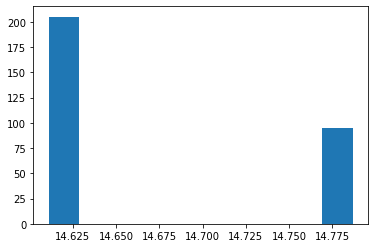

In [57]:
a=np.zeros(300)
for i in np.arange(0,300):
    a[i]=ue_list[i].mR
    
plt.hist(a)

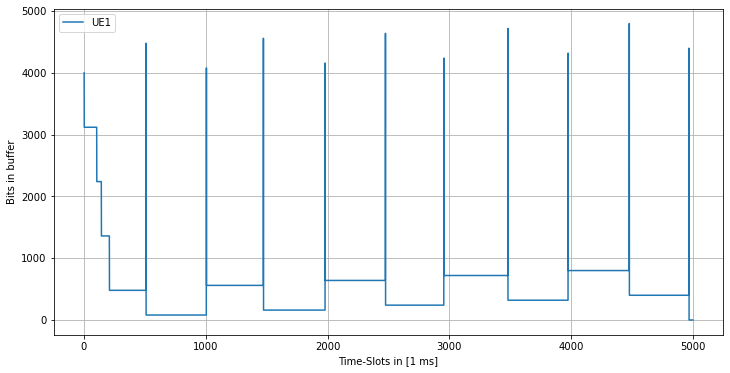

In [58]:
plt.figure(figsize=(12,6))
plt.plot(ue_list[0].mon.keys(),ue_list[0].mon.values(),label='UE1')
#plt.plot(ue_list[1].mon.keys(),ue_list[1].mon.values(),label='UE2')
#plt.plot(ue_list[2].mon.keys(),ue_list[2].mon.values(),label='UE3')
plt.xlabel('Time-Slots in [1 ms]')
plt.ylabel('Bits in buffer')
plt.legend(loc="upper left")
plt.grid()
#plt.axvline(x = 13, color = 'b', label = 'axvline - full height')
#plt.axvline(x = 27, color = 'b', label = 'axvline - full height')

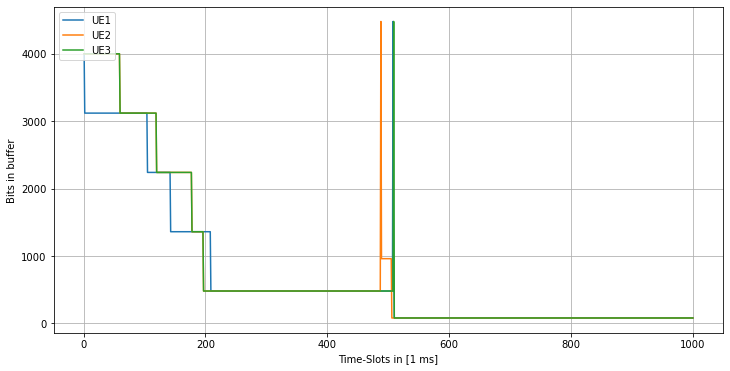

In [59]:
plt.figure(figsize=(12,6))
plt.plot(list(ue_list[0].mon.keys())[:1000],list(ue_list[0].mon.values())[:1000],label='UE1')
plt.plot(list(ue_list[1].mon.keys())[:1000],list(ue_list[1].mon.values())[:1000],label='UE2')
plt.plot(list(ue_list[2].mon.keys())[:1000],list(ue_list[2].mon.values())[:1000],label='UE3')
plt.xlabel('Time-Slots in [1 ms]')
plt.ylabel('Bits in buffer')
plt.legend(loc="upper left")
plt.grid()
#plt.axvline(x = 13, color = 'b', label = 'axvline - full height')
#plt.axvline(x = 27, color = 'b', label = 'axvline - full height')